<a href="https://colab.research.google.com/github/KenzaxTazi/Agri-Risk/blob/master/DataExploration_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
path = '/content/drive/My Drive/GTC'
os.chdir(path)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import datasets

In [0]:
# come back to 10-day features later

#ten_day_df = pd.read_csv('head_of_soils_recommendations.csv')
#ten_day_df

In [0]:
#cols = ten_day_df.columns.tolist()
#cols

In [0]:
#ten_day_features_df = ten_day_df.drop(['Unnamed: 0', 'alloc_key', 'alloc_key', 'iso3'])

In [0]:
#correlations = ten_day_df.corr()
#f, ax = plt.subplots(figsize=(24, 18))
#sns.heatmap(correlations, vmax=.8, square=True, cmap='Blues')

In [12]:
seasonal_df = pd.read_csv("WORLD_['maiz']_['CDD', 'CWD', 'CFD', 'CSDI', 'WSDI', 'WW']_2010_2005_climate_zones_onehot.csv")
seasonal_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,iso3_2005,x,y,maiz_a_2005,maiz_a_2010,delta_maiz,maiz_percent_change,CDD-Q1_2005,CDD-Q1_2010,CDD-Q2_2005,CDD-Q2_2010,CDD-Q3_2005,CDD-Q3_2010,CDD-Q4_2005,CDD-Q4_2010,CWD-Q1_2005,CWD-Q1_2010,CWD-Q2_2005,CWD-Q2_2010,CWD-Q3_2005,CWD-Q3_2010,CWD-Q4_2005,CWD-Q4_2010,CFD-Q1_2005,CFD-Q1_2010,CFD-Q2_2005,CFD-Q2_2010,CFD-Q3_2005,CFD-Q3_2010,CFD-Q4_2005,CFD-Q4_2010,CSDI-Q1_2005,CSDI-Q1_2010,CSDI-Q2_2005,CSDI-Q2_2010,CSDI-Q3_2005,CSDI-Q3_2010,CSDI-Q4_2005,CSDI-Q4_2010,WSDI-Q1_2005,WSDI-Q1_2010,WSDI-Q2_2005,WSDI-Q2_2010,WSDI-Q3_2005,WSDI-Q3_2010,WSDI-Q4_2005,WSDI-Q4_2010,WW-Q1_2005,WW-Q1_2010,WW-Q2_2005,WW-Q2_2010,WW-Q3_2005,WW-Q3_2010,WW-Q4_2005,WW-Q4_2010,climate_zone,soil_type,Inland water bodies,Subtropics - summer rainfall,Subtropics - winter rainfall,Temperature - continental,Temperature - oceanic,Temperature - subcontinental,Tropics
0,236476,236476,236476,532948,CIV,-3.208,5.208,2292.2,2867.5,575.3,0.250982,24.0,31.0,3.0,2.0,6.0,6.0,2.0,1.0,10.0,21.0,30.0,26.0,25.0,27.0,65.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,24.0,1.0,11.0,13.0,16.0,Inland water bodies,4.0,1,0,0,0,0,0,0
1,298568,298568,298568,646330,USA,-76.042,35.958,6665.7,6052.0,-613.7,-0.092068,18.0,8.0,7.0,11.0,11.0,6.0,12.0,11.0,5.0,4.0,5.0,5.0,11.0,6.0,9.0,6.0,9.0,15.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,3.0,3.0,4.0,Inland water bodies,2.0,1,0,0,0,0,0,0
2,298565,298565,298565,646327,USA,-76.292,35.958,7071.2,6420.1,-651.1,-0.092078,18.0,8.0,7.0,11.0,11.0,6.0,12.0,11.0,5.0,4.0,5.0,5.0,11.0,6.0,9.0,6.0,9.0,15.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,3.0,3.0,4.0,Inland water bodies,2.0,1,0,0,0,0,0,0
3,298564,298564,298564,646326,USA,-76.458,35.958,7471.4,6671.0,-800.4,-0.107129,18.0,8.0,7.0,11.0,11.0,6.0,12.0,11.0,5.0,4.0,5.0,5.0,11.0,6.0,9.0,6.0,9.0,15.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,3.0,3.0,4.0,Inland water bodies,2.0,1,0,0,0,0,0,0
4,31935,31935,31935,63870,CHN,116.042,29.792,8656.9,7956.7,-700.2,-0.080883,17.0,11.0,11.0,8.0,8.0,6.0,22.0,21.0,6.0,4.0,7.0,7.0,10.0,14.0,8.0,5.0,9.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,5.0,0.0,Inland water bodies,1.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307857,203857,203857,203857,461737,RUS,61.375,54.625,2170.3,2179.6,9.3,0.004285,30.0,17.0,11.0,22.0,11.0,11.0,29.0,35.0,4.0,4.0,2.0,3.0,7.0,5.0,4.0,2.0,90.0,90.0,37.0,48.0,0.0,0.0,22.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,Temperature - continental,18.0,0,0,0,1,0,0,0
307858,203858,203858,203858,461738,RUS,61.458,54.625,2062.6,2071.4,8.8,0.004266,30.0,17.0,11.0,22.0,11.0,11.0,29.0,35.0,4.0,4.0,2.0,3.0,7.0,5.0,4.0,2.0,90.0,90.0,37.0,48.0,0.0,0.0,22.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,Temperature - continental,18.0,0,0,0,1,0,0,0
307859,5231,5231,5231,11383,CHN,123.542,43.792,5086.2,4958.5,-127.7,-0.025107,39.0,29.0,38.0,10.0,11.0,13.0,25.0,26.0,2.0,1.0,2.0,4.0,12.0,8.0,4.0,3.0,90.0,90.0,19.0,29.0,0.0,0.0,26.0,11.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,3.0,0.0,Temperature - continental,33.0,0,0,0,1,0,0,0
307860,2,2,2,9,CHN,123.042,53.292,2819.2,3918.1,1098.9,0.389791,27.0,27.0,49.0,29.0,8.0,9.0,14.0,16.0,2.0,3.0,2.0,5.0,7.0,4.0,3.0,4.0,90.0,90.0,65.0,61.0,1.0,1.0,61.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,2.

In [0]:
# filter out some unnecessary columns
seasonal_features_df = seasonal_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],
                                        axis=1)

In [14]:
seasonal_features_2005_df = seasonal_features_df.filter(regex='.*[^2010]$', axis=1)
seasonal_features_2005_df

,iso3_2005,x,y,maiz_a_2005,delta_maiz,maiz_percent_change,CDD-Q1_2005,CDD-Q2_2005,CDD-Q3_2005,CDD-Q4_2005,CWD-Q1_2005,CWD-Q2_2005,CWD-Q3_2005,CWD-Q4_2005,CFD-Q1_2005,CFD-Q2_2005,CFD-Q3_2005,CFD-Q4_2005,CSDI-Q1_2005,CSDI-Q2_2005,CSDI-Q3_2005,CSDI-Q4_2005,WSDI-Q1_2005,WSDI-Q2_2005,WSDI-Q3_2005,WSDI-Q4_2005,WW-Q1_2005,WW-Q2_2005,WW-Q3_2005,WW-Q4_2005,climate_zone,soil_type,Inland water bodies,Subtropics - summer rainfall,Subtropics - winter rainfall,Temperature - continental,Temperature - oceanic,Temperature - subcontinental,Tropics
0,CIV,-3.208,5.208,2292.2,575.3,0.250982,24.0,3.0,6.0,2.0,10.0,30.0,25.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,13.0,Inland water bodies,4.0,1,0,0,0,0,0,0
1,USA,-76.042,35.958,6665.7,-613.7,-0.092068,18.0,7.0,11.0,12.0,5.0,5.0,11.0,9.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,Inland water bodies,2.0,1,0,0,0,0,0,0
2,USA,-76.292,35.958,7071.2,-651.1,-0.092078,18.0,7.0,11.0,12.0,5.0,5.0,11.0,9.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,Inland water bodies,2.0,1,0,0,0,0,0,0
3,USA,-76.458,35.958,7471.4,-800.4,-0.107129,18.0,7.0,11.0,12.0,5.0,5.0,11.0,9.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,Inland water bodies,2.0,1,0,0,0,0,0,0
4,CHN,116.042,29.792,8656.9,-700.2,-0.080883,17.0,11.0,8.0,22.0,6.0,7.0,10.0,8.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,6.0,0.0,3.0,0.0,5.0,Inland water bodies,1.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307857,RUS,61.375,54.625,2170.3,9.3,0.004285,30.0,11.0,11.0,29.0,4.0,2.0,7.0,4.0,90.0,37.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,Temperature - continental,18.0,0,0,0,1,0,0,0
307858,RUS,61.458,54.625,2062.6,8.8,0.004266,30.0,11.0,11.0,29.0,4.0,2.0,7.0,4.0,90.0,37.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,Temperature - continental,18.0,0,0,0,1,0,0,0
307859,CHN,123.542,43.792,5086.2,-127.7,-0.025107,39.0,38.0,11.0,25.0,2.0,2.0,12.0,4.0,90.0,19.0,0.0,26.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,3.0,Temperature - continental,33.0,0,0,0,1,0,0,0
307860,CHN,123.042,53.292,2819.2,1098.9,0.389791,27.0,49.0,8.0,14.0,2.0,2.0,7.0,3.0,90.0,65.0,1.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Boreal - continental,40.0,0,0,0,0,0,0,0


# Data Visualization

## Heatmap

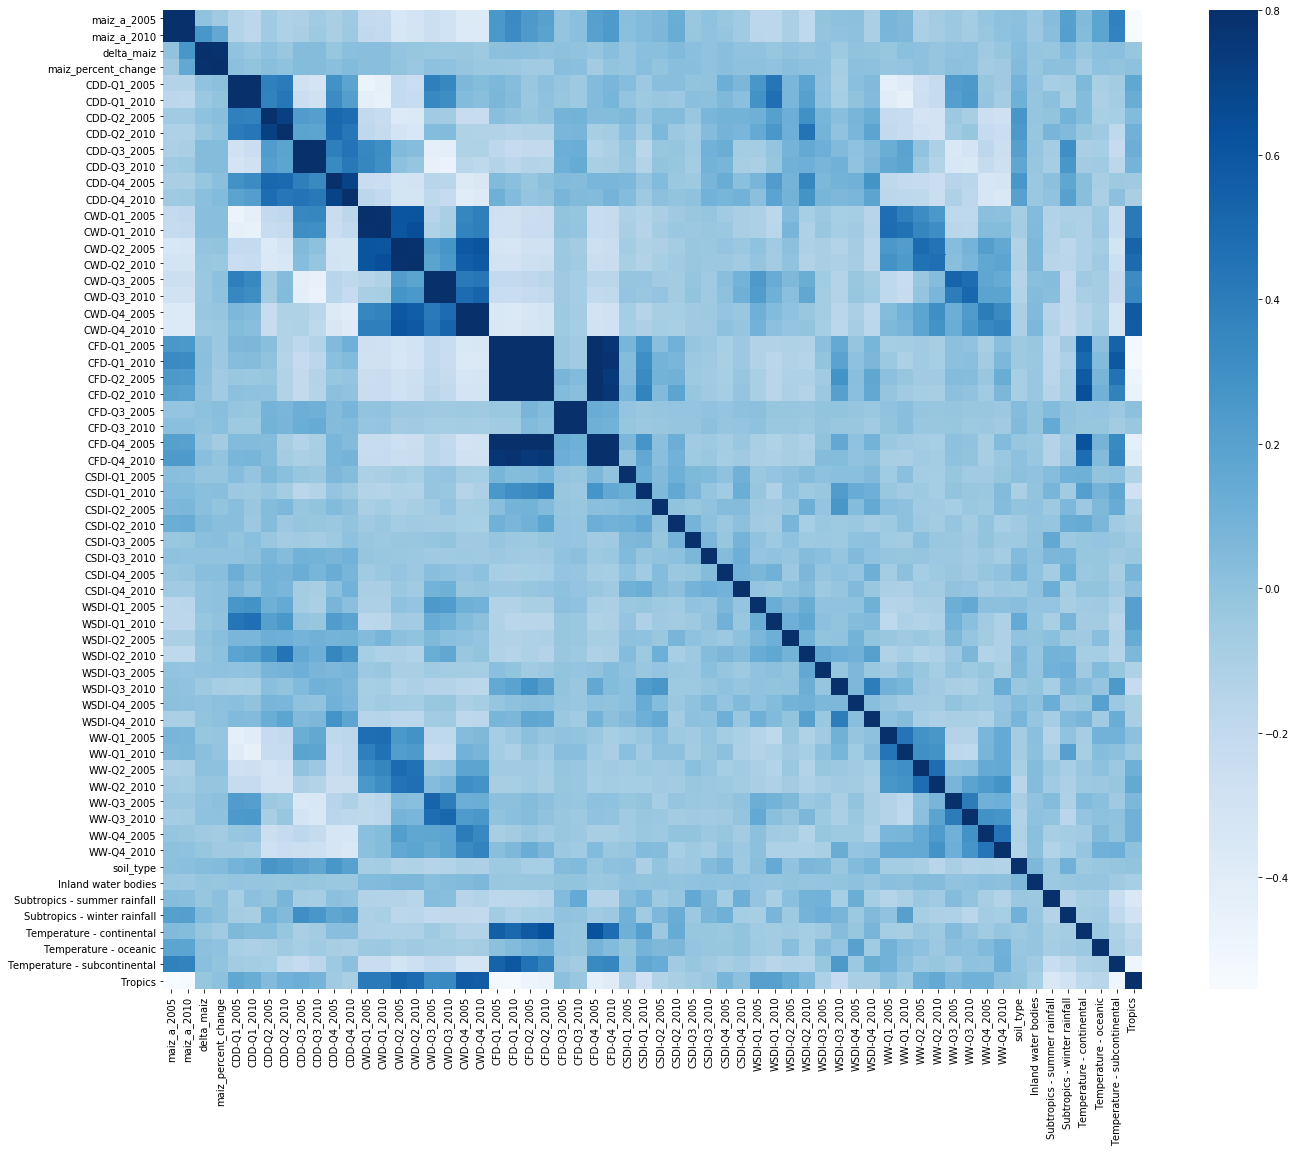

In [0]:
# initial attempt at correlation heatmap for all features in dataframe

correlations = seasonal_features_df.drop(['iso3_2005', 'x', 'y'], axis=1).corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(correlations, vmax=.8, square=True, cmap='Blues')

Text(0.5, 1, '2005 Seasonal Feature Correlations')

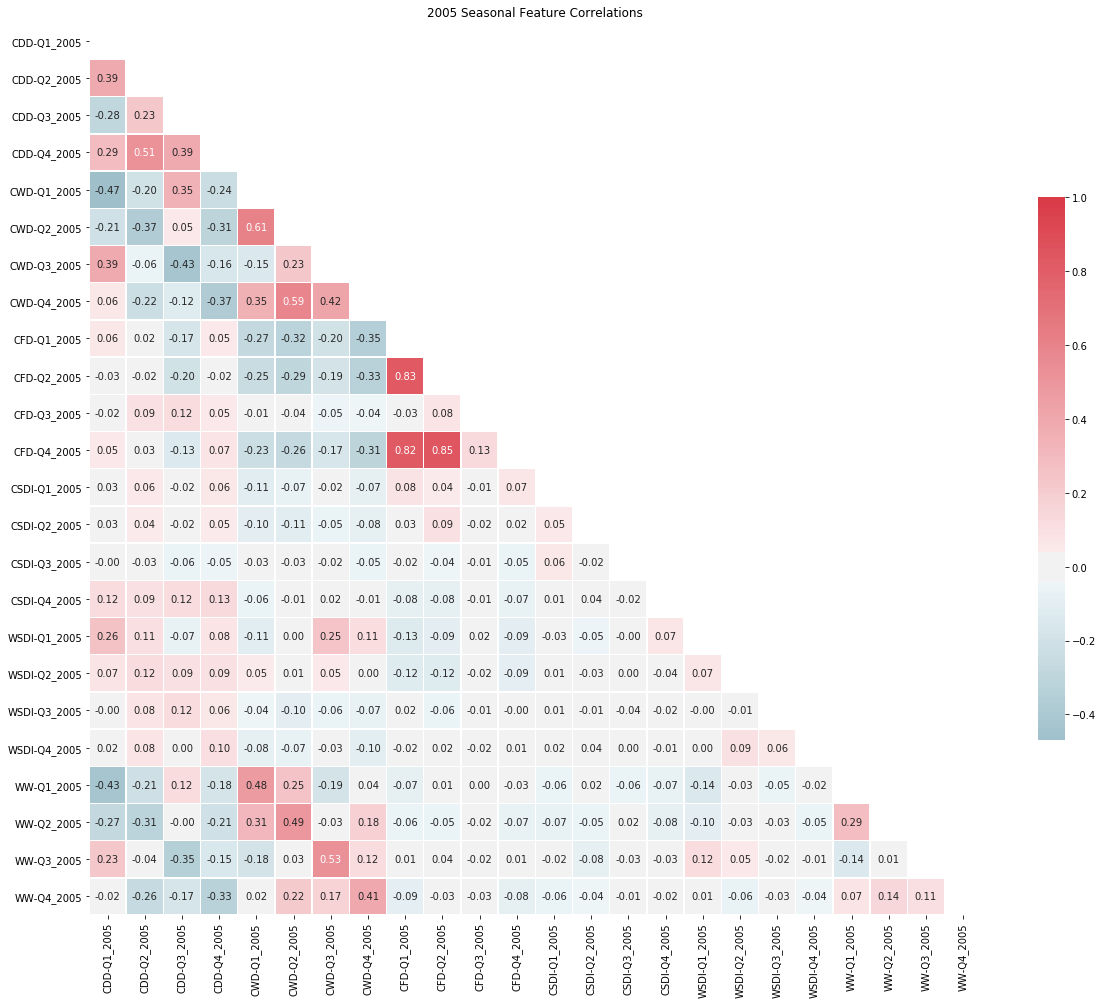

In [0]:
# heatmap of 2005 seasonal ACI features - if there are strongly correlated features some can be removed

f, ax = plt.subplots(figsize=(20, 20))
corr = seasonal_features_2005_df.select_dtypes(exclude=["object","bool"]).corr()
 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# plt.subplots_adjust(top=0.99)
plt.title("2005 Seasonal Feature Correlations")

## Histograms

Text(0.5, 0.98, 'Histograms of various features')

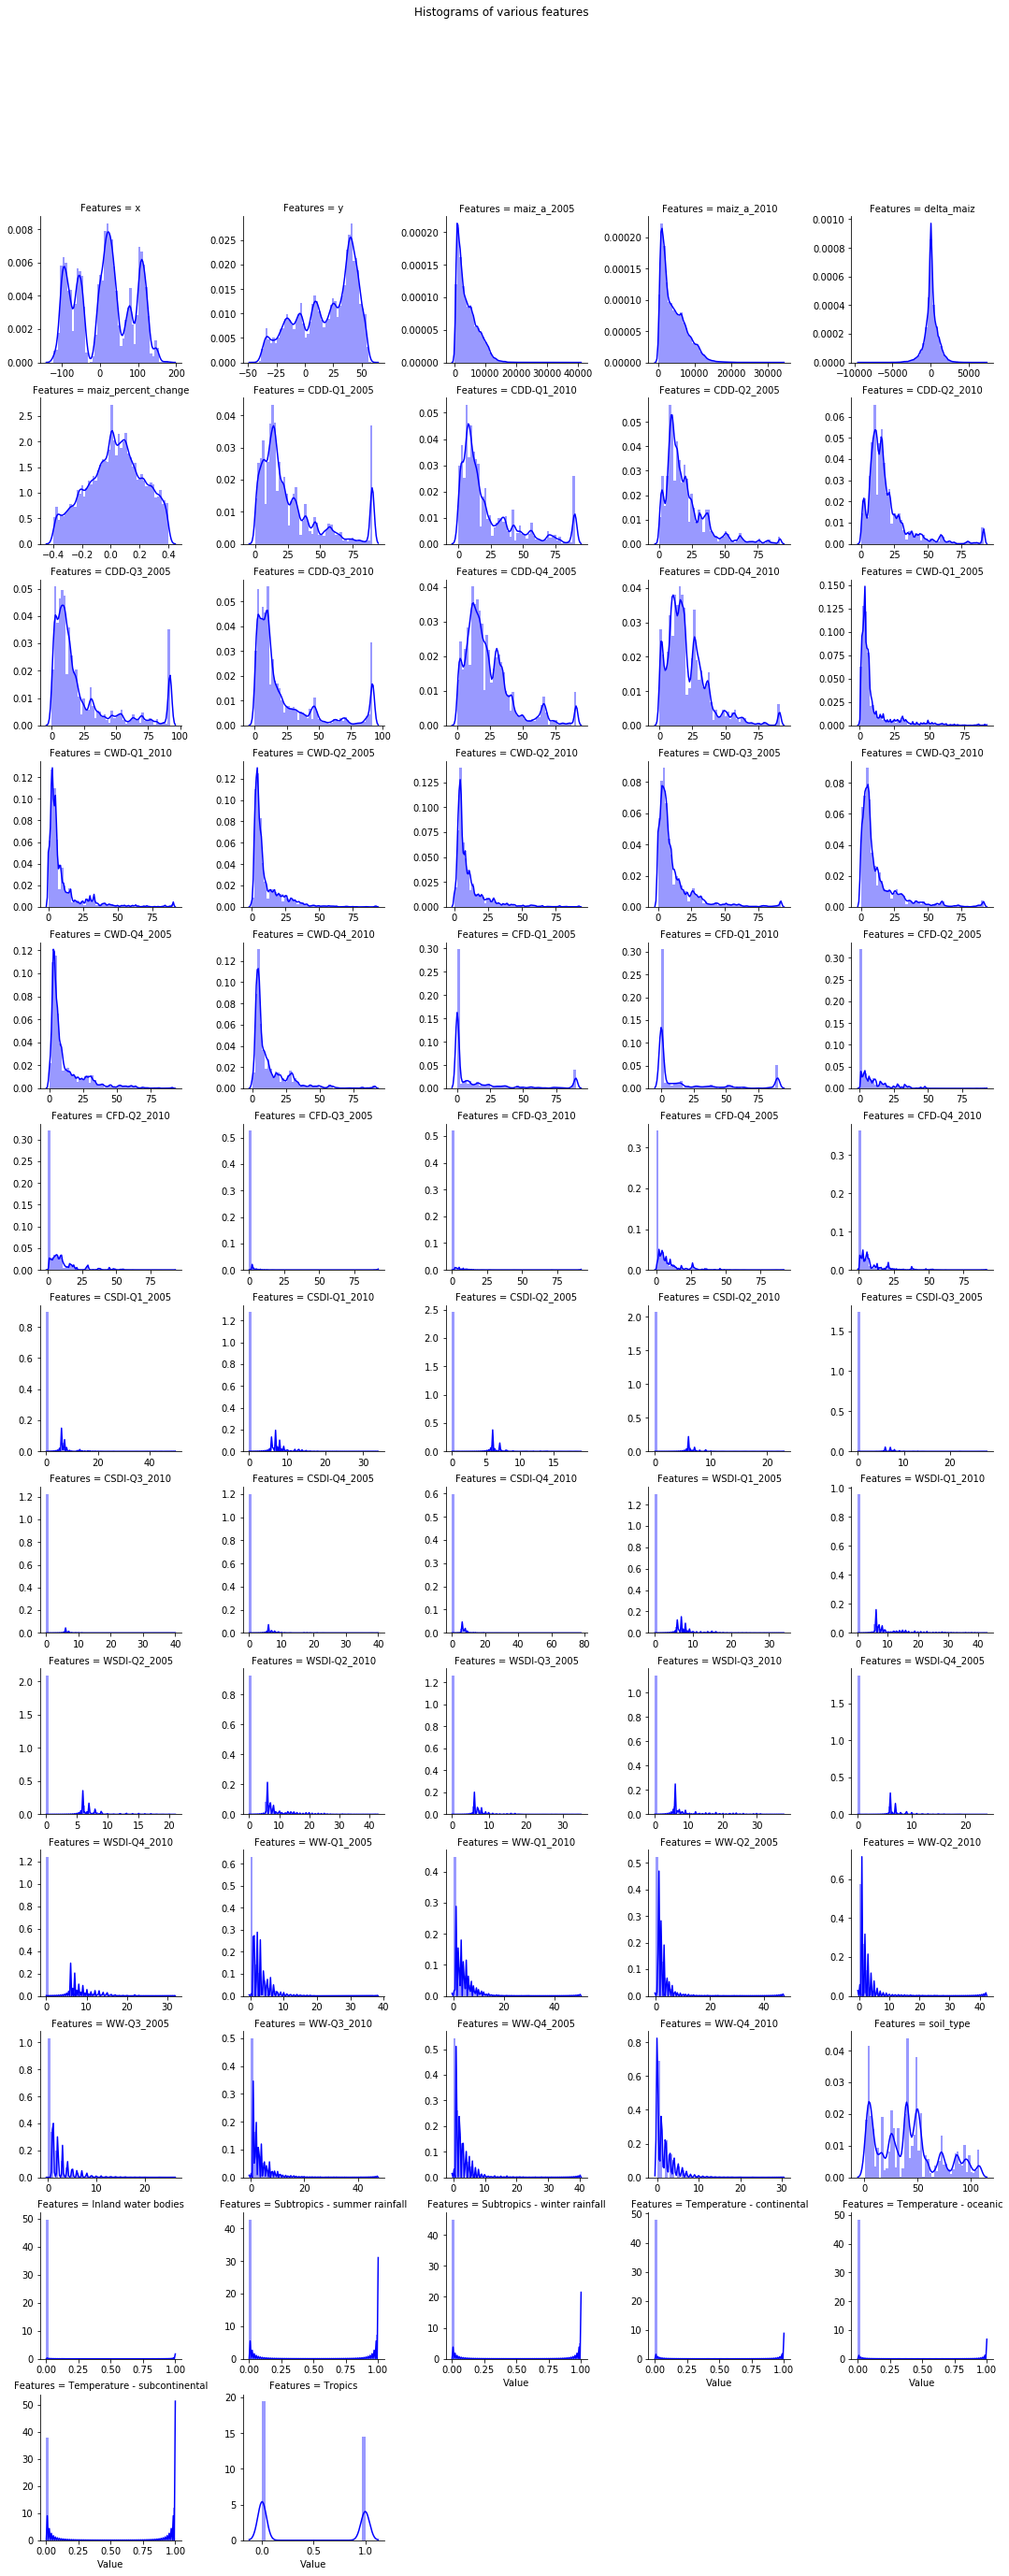

In [0]:
# generate histogram for every feature
# this isn't very useful rn

numeric_features= seasonal_features_df.select_dtypes(exclude=["object","bool"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
g = sns.FacetGrid(data =numeric_features, col="Features",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value", color ='blue')
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")

In [0]:
#seasonal_features_df.columns

## Scatterplots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


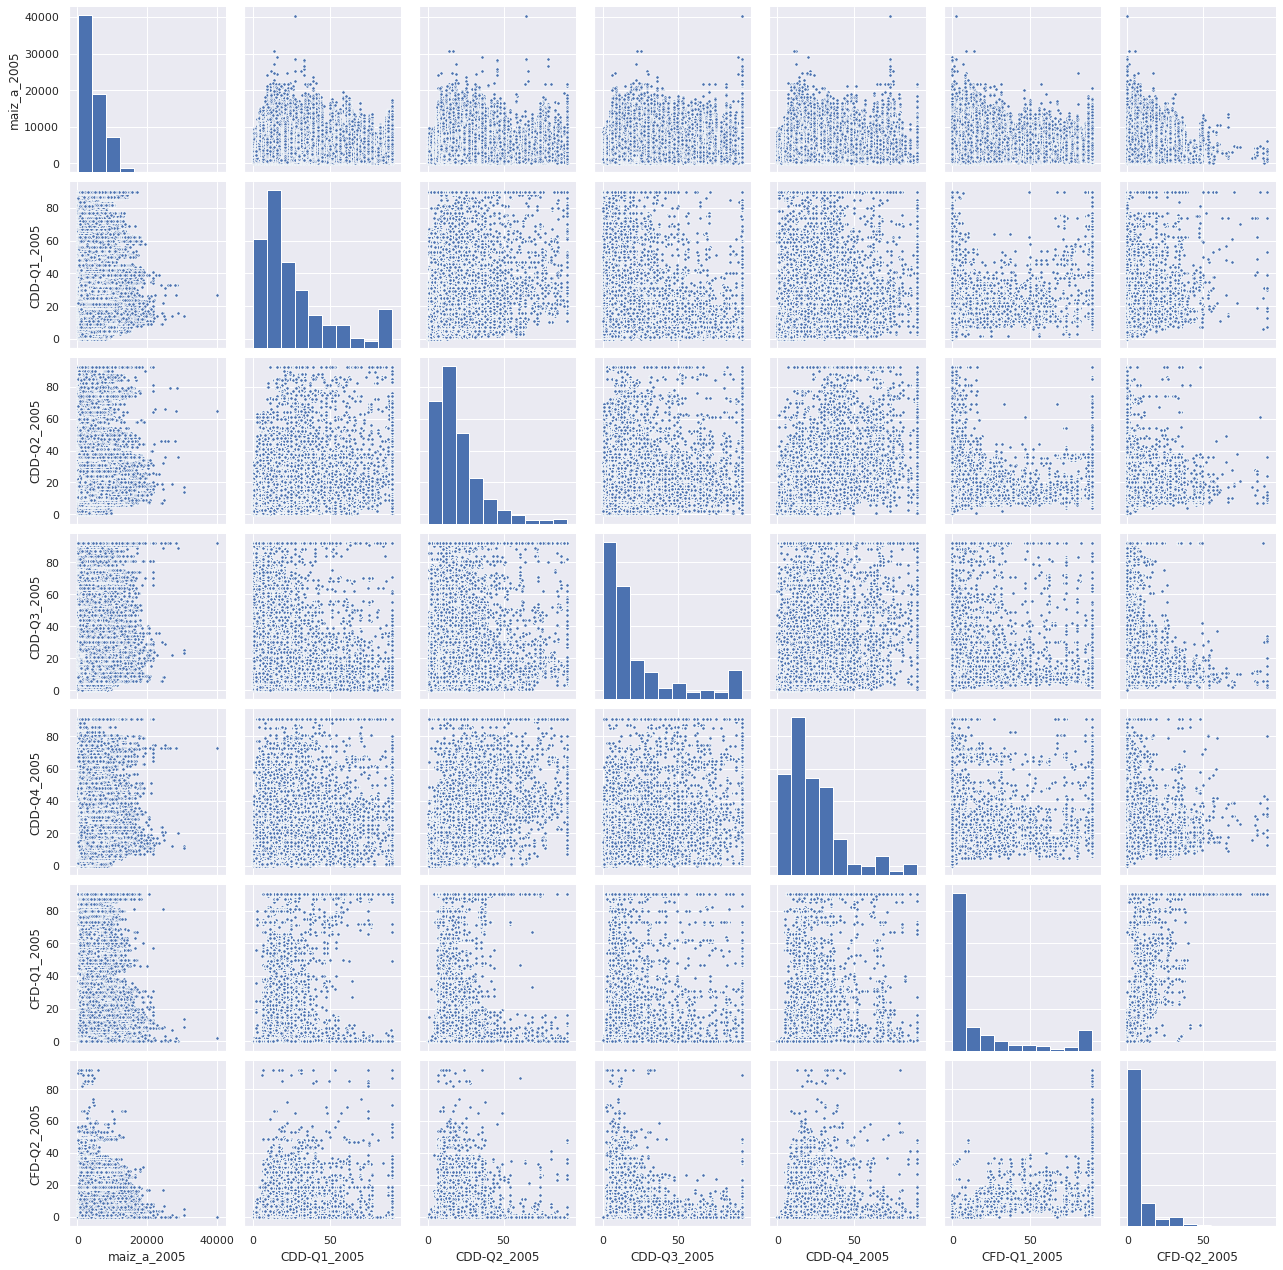

In [44]:
#scatterplot
sns.set()
cols = ['maiz_a_2005', 'CDD-Q1_2005', 'CDD-Q2_2005', 'CDD-Q3_2005', 'CDD-Q4_2005', 'CFD-Q1_2005', 'CFD-Q2_2005']
sns.pairplot(seasonal_features_df[cols], size = 2.5, plot_kws={"s": 12})
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


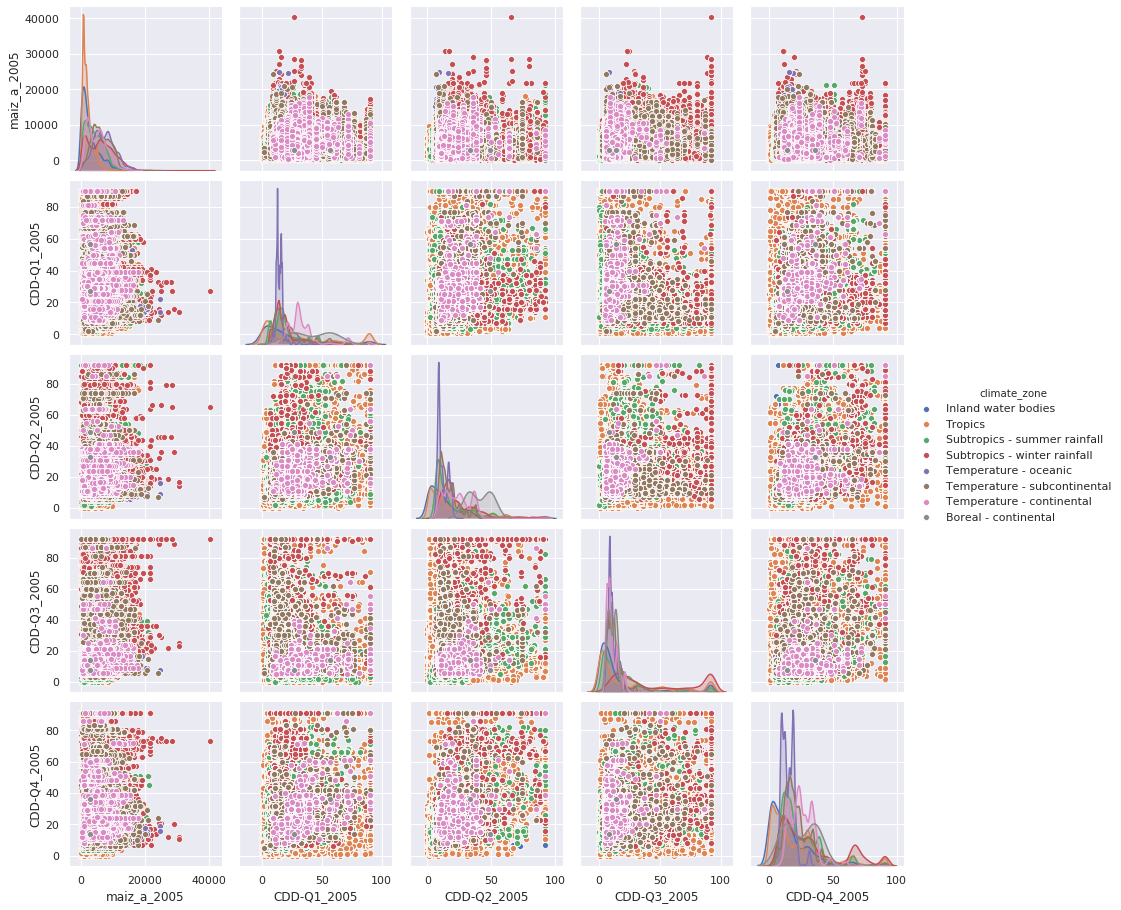

In [10]:
sns.set()
cols = ['maiz_a_2005', 'CDD-Q1_2005', 'CDD-Q2_2005', 'CDD-Q3_2005', 'CDD-Q4_2005', 'climate_zone']
sns.pairplot(seasonal_features_2005_df[cols], hue='climate_zone')
plt.show()

# Feature Selection

## Filtering

In [0]:
#list(seasonal_features_df.filter(regex='2005$', axis=1))

In [17]:
# filter out features with correlations to maize yeild < specified value

min_cor = 0.2 # minimum correlation below which features will be filtered
cor = seasonal_features_df.filter(regex='2005$', axis=1).corr()
cor_target = cor['maiz_a_2005']
relevant_features = cor_target[cor_target>min_cor]
relevant_features

maiz_a_2005    1.000000
CFD-Q1_2005    0.256211
CFD-Q2_2005    0.245096
CFD-Q4_2005    0.209421
Name: maiz_a_2005, dtype: float64

## Recursive Feature Elimination

In [0]:
seasonal_features_df.dropna(inplace=True)
X=seasonal_features_df.drop(['iso3_2005','climate_zone'], axis=1).drop(['maiz_a_2010'], axis=1)
y = seasonal_features_df['maiz_a_2010']

In [0]:
train_test_df = seasonal_features_df.drop(['iso3_2005','climate_zone'], axis=1)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_test_df, test_size=0.2, random_state=43)

X_train = train_set.drop("maiz_a_2010", axis=1)
Y_train = train_set["maiz_a_2010"].copy()

X_test = test_set.drop("maiz_a_2010", axis=1)
Y_test = test_set["maiz_a_2010"].copy()

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
model.fit(X_train,Y_train)
model.oob_score_

0.9620625591850274

In [0]:
model.score(X_test,Y_test)

0.9612274922245012

In [0]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
#Initializing RFE model
rfe = RFE(model, 10)
X=seasonal_features_df.drop(['iso3_2005','climate_zone'], axis=1).fillna(0).drop(['maiz_a_2010'], axis=1)
y = seasonal_features_df['maiz_a_2010']
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

KeyboardInterrupt: ignored

In [0]:
#no of features
nof_list=np.arange(1,30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

X = seasonal_features_df.drop(['iso3_2005','climate_zone'], axis=1).fillna(0).drop(['maiz_a_2010'], axis=1)[0:100000]
y = seasonal_features_df['maiz_a_2010'].copy()[0:100000]

for n in range(len(nof_list)):
    print(n)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    #model = LinearRegression()
    model = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    rfe = RFE(model,nof_list[n])
    print("~")
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    print("~")
    X_test_rfe = rfe.transform(X_test)
    print("~")
    model.fit(X_train_rfe,y_train)
    print("~")
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    print("number of features: ", nof_list[n], " --- score: ", score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

0
~


KeyboardInterrupt: ignored

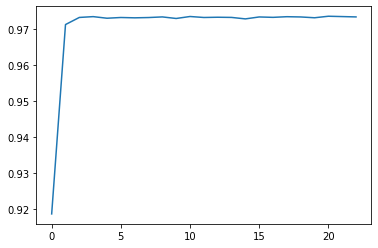

In [0]:
# need to run this on the whole dataset 

# results below were from 10,000 rows of data but this doesn't show much

scores = [0.9187050039587052, 0.9713138194171436, 0.9732924799943592, 
          0.9735171597733691, 0.9730738040972429, 0.9732754581292137, 
          0.97318583527149, 0.9732637689244757, 0.9734383918634069, 
          0.9730043954846442, 0.973552476879495, 0.9732802089170813, 
          0.9733488395744003, 0.9732995199091196, 0.972889079684609, 
          0.9734264211945545, 0.973316735274729, 0.9734976129793876, 
          0.9734265145453425, 0.9732032022100867, 0.9736247664954469,
          0.9735323655326944, 0.9734368484383948]
plt.plot(scores)

In [0]:
# output the n most important features as selected by RFE

cols = list(X.columns)
model = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)

rfe = RFE(model, 7)             
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

KeyboardInterrupt: ignored

In [0]:
#len(list(seasonal_features_df))